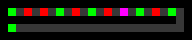

0 6 0
test1: None 86


In [1]:
from PIL import Image
from IPython import display
import numpy as np
import cv2
import random
import copy
import math
import time

#load data
def ld(d):
    #d=open("18.txt").read()
    d=d.split('\n')
    M={}
    L={}
    p=None
    i=[]
    for y,l in enumerate(d):
        for x,v in enumerate(l):
            
            #M[p]='.'
            if v=='@':
                M[(x,y)]='.'
                p=(x,y)
            elif v.isalpha():
                L[v]=(x,y)
                M[(x,y)]='.'
            elif v=='.':
                M[(x,y)]='.'
    return M,L,p,i,len(d[0]),len(d)
                
#print image
def pretty(M,L,p,i,w,h):
    m=np.zeros([h,w,3]).astype(np.uint8)
    for x,y in M.keys() :
        m[y,x,:]=[55,55,55]
    x,y=p
    m[y,x,:]=[255,0,255]
    for v in L.keys():
        x,y=L[v]
        if v.isupper():
            if not v.lower() in i:
                m[y,x,:]=[255,0,0]
        else:
            if not v in i:
                m[y,x,:]=[0,255,0]
    F=8
    m = cv2.resize(m, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    display.clear_output(wait=True)
    display.display(Image.fromarray(m))

#distance
def dist(a,b):
    x0,y0=a
    x1,y1=b
    dx=int(abs(x1-x0))
    dy=int(abs(y1-y0))
    #return math.sqrt(dx*dx+dy*dy)
    return dx+dy
    
#Heurestic
def H(p,i,L):
    r=0
    x,y=p
    for k in L.keys():
        if k.islower():
            if not k in i:
                r+=dist(p,L[k])
                pass
        #else:
        #    if k.lower() in i:
        #        r+=dist(p,L[k])
    return r

#recursive steps to speed up search
def _walk(M,L,x,y,lx,ly,i,cost=1):
    if (x,y) in L.values():
        return (x,y),cost
    if (x,y) in M:
        nxt=[]
        for dx,dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            p2=(x+dx,y+dy)
            if p2 in M and p2!=(lx,ly):
                nxt.append(p2)
        if len(nxt)==1:
            return _walk(M,L,nxt[0][0],nxt[0][1],x,y,i,cost+1)
        else:
            return (x,y),cost
    return None,0

#cached search 
walkmem={}
def walk(M,L,x,y,lx,ly,i):
    desc=(x,y,lx,ly,tuple(set(i)))
    if desc in walkmem:
        #print("mem")
        return walkmem[desc]
    r=_walk(M,L,x,y,lx,ly,i)
    walkmem[desc]=r
    return r


tstd="""########################
#f.D.E.e.C.b.A.@.a.B.c.#
######################.#
#d.....................#
########################"""
def p1(d): 
    steps=0
    M,L,p,i,w,h=ld(d)
    Linv={}
    for k in L.keys():
        Linv[L[k]]=k
    allkeys=sum([1 if v.islower() else 0 for v in L.keys()])
    past={}
    e=[(p,i,0,H(p,i,L))]
    lasttime = time.time() 
    pretty(M,L,p,i,w,h)
    #print(L,p)
    #time.sleep(10)
    while len(e):
        p,i,c,_=e[0]
        e=e[1:]
        
        t = time.time()
        if t > lasttime:
            lasttime = t + 3
            pretty(M,L,p,i,w,h)
            print(len(i),allkeys,c)
        
        if len(i)==allkeys:
            print("goal")
            return c
        
        for dx,dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            x,y=p
            p2,cost=walk(M,L,x+dx,y+dy,x,y,i)
            #p2=(x+dx,y+dy)
            #cost=1
            if p2 in M:
                #print(p2,L)
                #return
                i2=copy.copy(i)
                if p2 in Linv:
                    
                    v=Linv[p2]
                    #print(v)
                    #return
                    if v.isupper():
                        if not v.lower() in i2:
                            break
                    else:
                        if not v in i2:
                            i2.append(v)
                dsc=(p2,tuple(set(i2)))
                if not dsc in past:
                    e.append((p2,i2,c+cost,H(p2,i2,L)))
                    past[dsc]=1
        e=sorted(e,key=lambda x: sum(x[2:]),)
        steps+=1
        
    
print("test1:",p1(tstd),86)





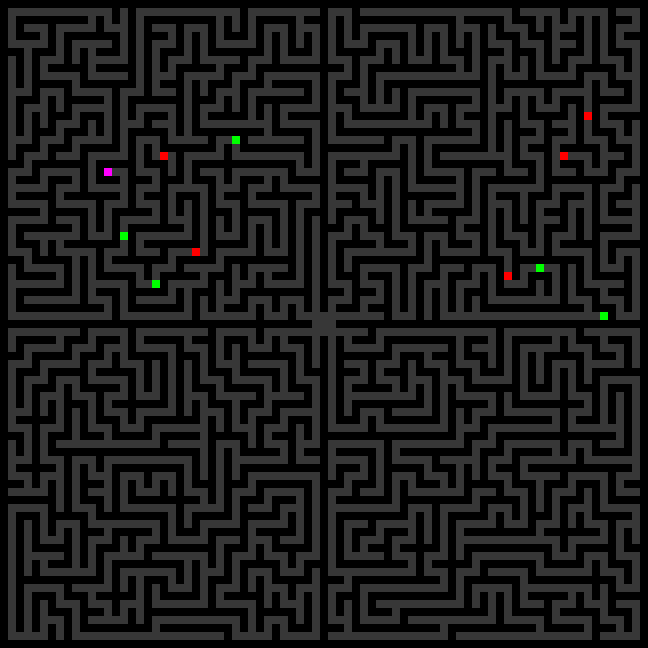

21 26 4554
goal
part1: 6316 6316


In [2]:
print("part1:",p1(open("18.txt").read()),6316)